# Diorama intrusion of Goias Alkaline Province visualization

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd
from fatiando.utils import ang2vec, vec2ang

In [3]:
notebook_name = 'Diorama_intrusion_plot.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

#### Open a dictionary

In [5]:
data_set = dict()

#### Saving files

In [6]:
saved_files = []

## Loading real data for Diorama complex

### Columns to load and filename

In [7]:
filename = 'data_filtered_XYZ_area_12'

In [8]:
names = ['X','Y','GPSALT','MAGRAW','MAGIGRF','IGRF','LONG','LAT']

### Real data

In [9]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6,7),na_values= '*',
                   names=names,skipinitialspace=True,delim_whitespace=True).dropna(axis=0)

## Properties of survey

### Total field anomaly

In [10]:
data_set['total_field_12'] = data.iloc[:,3].get_values()

In [11]:
data_set['tfa_12'] = data.iloc[:,4].get_values()

In [12]:
data_set['igrf_12'] = data.iloc[:,5].get_values()

In [13]:
data_set['tfa_calc_12'] = data_set['total_field_12'] - data_set['igrf_12']

### Obervations coordinates

In [14]:
data_set['x'] = data.iloc[:,1].get_values()

In [15]:
data_set['y'] = data.iloc[:,0].get_values()

In [16]:
data_set['elev'] = data.iloc[:,2].get_values()

In [17]:
data_set['height'] = - np.mean(data_set['elev'])

In [18]:
data_set['height'] 

-527.2325033200531

In [19]:
data_set['z'] = data_set['height']*np.ones_like(data_set['x'])

In [20]:
#data_set['z'] = - data_set['elev']

#### Survey information

In [21]:
data_set['N'] = np.size(data_set['tfa_12'])

In [22]:
data_set['dx'] = data_set['x'][0] - data_set['x'][1]

In [23]:
Nx = abs(int(((data_set['x'].max() - data_set['x'].min())/(data_set['dx']))))

In [24]:
Ny = data_set['N']/Nx

In [25]:
data_set['dy'] = abs(int(((data_set['y'].max() - data_set['y'].min())/(Ny-1))))

In [26]:
data_set['shape'] = Nx,Ny

In [27]:
print 'Shape : (%.0f,%.0f)'% data_set['shape'] 
print 'Number of data: %.1f' % data_set['N']
print 'dx: %.1f m' % data_set['dx']
print 'dy: %.1f m ' % data_set['dy']

Shape : (78,19)
Number of data: 1506.0
dx: 98.0 m
dy: 502.0 m 


#### Main field

In [28]:
inc_gf = -19.5

In [29]:
dec_gf = -18.5

In [30]:
data_set['main_field'] = inc_gf,dec_gf 

In [31]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Real data visualization for Diorama

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


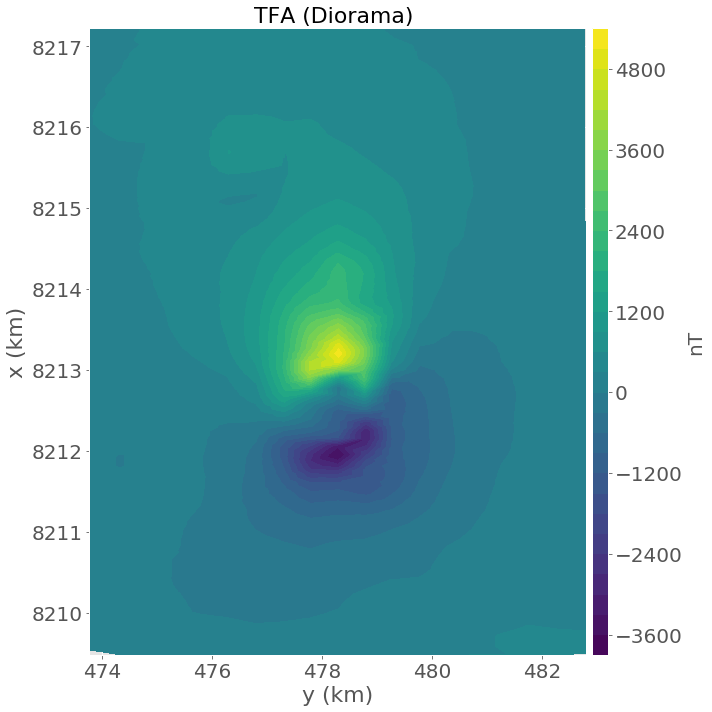

In [32]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('TFA (Diorama) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['tfa_12'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/data_diorama'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## IGRF visualization for Diorama area

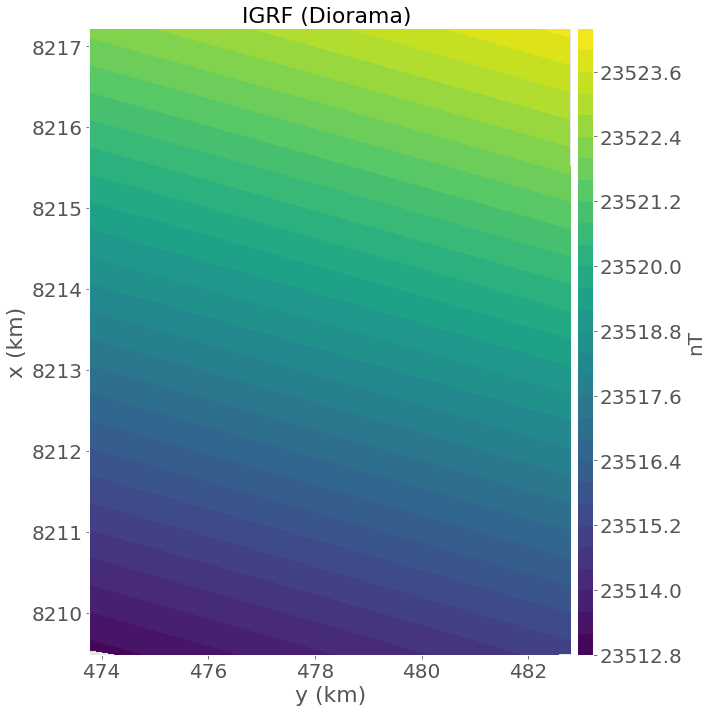

In [33]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('IGRF (Diorama) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['igrf_12'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/igrf_data_diorama'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Total field for Diorama intrusion

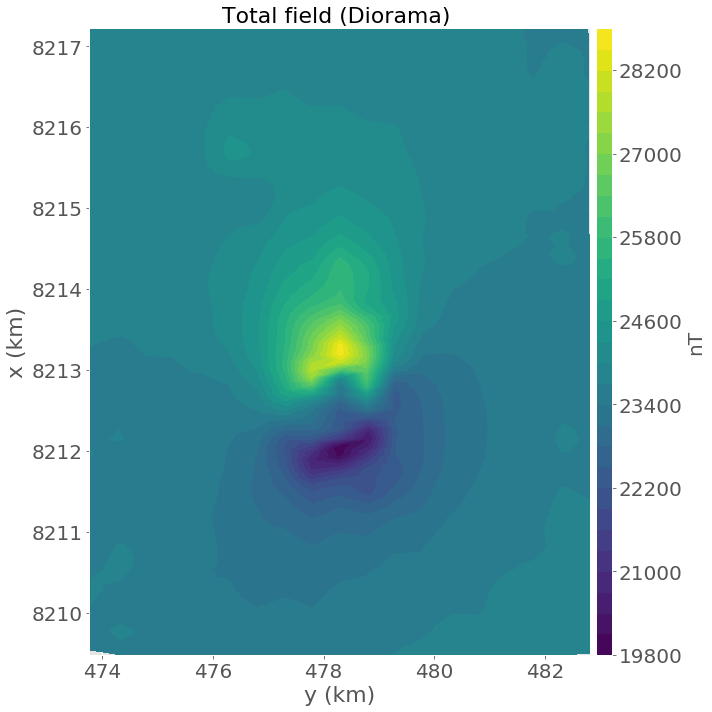

In [34]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Total field (Diorama) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['total_field_12'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/total_field_data_diorama'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Total field anomaly calculated for Diorama intrusion

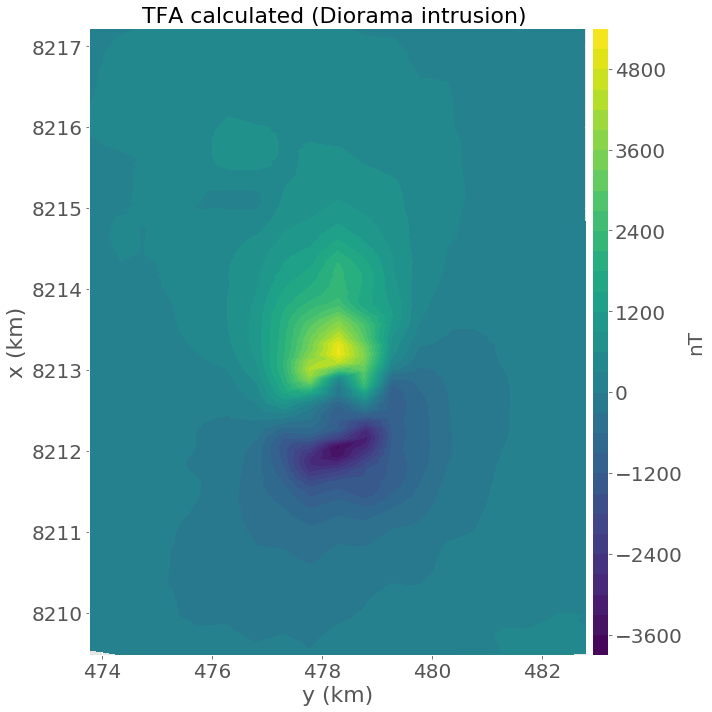

In [35]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('TFA calculated (Diorama intrusion) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['tfa_calc_12'],30, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/tfa_calc_data_diorama'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Flight varation

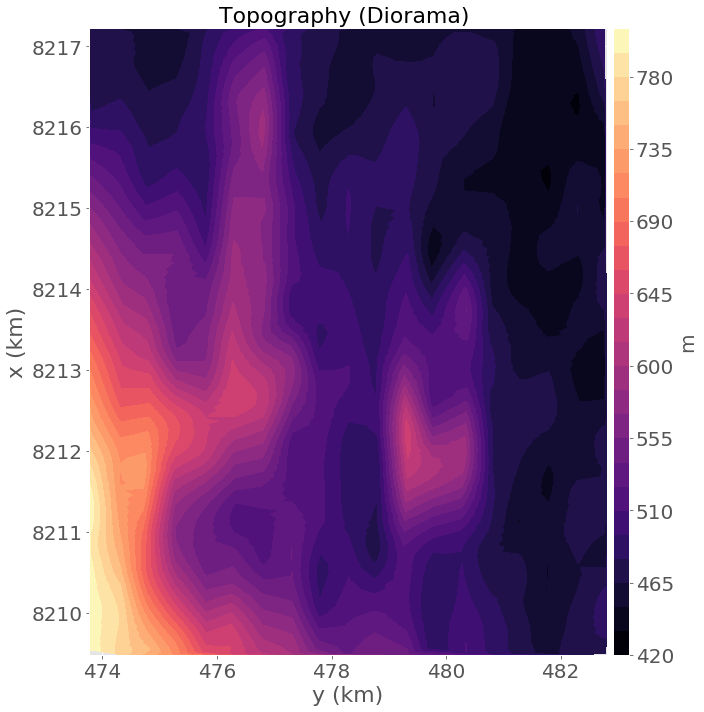

In [36]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Topography (Diorama) ', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data_set['y'].min(),1e-3*data_set['y'].max())
plt.ylim(1e-3*data_set['x'].min(),1e-3*data_set['x'].max())
plt.tricontourf(1e-3*data_set['y'],1e-3*data_set['x'],
                data_set['elev'],30, cmap='magma')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('m',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/elevation_diorama'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Generating .pickle file

In [37]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [38]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

## Saved files

In [39]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/data_diorama.png
2  figs/igrf_data_diorama.png
3  figs/total_field_data_diorama.png
4  figs/tfa_calc_data_diorama.png
5  figs/elevation_diorama.png
6  data/data_set.pickle
